In [1]:
from importlib import reload
import scModel
reload(scModel)
myModel = scModel.Model(Del0=0, Deld=0.8, Dels=0, mu=1, t=1, inhomp=True, inhomi=False)

H = myModel.HBdG()

In [2]:
G = myModel.simple_stats()
print(G['avgap'])
H(1, 2)[8]

[1.12317168 2.14710004 0.70894712 2.14710004 1.12317168]


array([ 0.        +0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j,
        0.86448369+0.j,  0.        +0.j,  0.        +0.j,  1.08060461+0.j,
       -1.        +0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j])

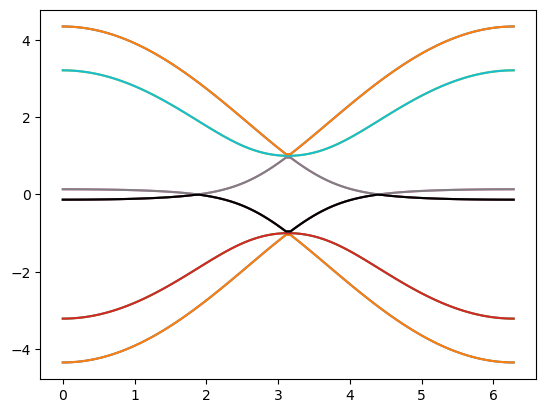

In [3]:
# Calculating energies along 
import numpy as np
import matplotlib.pyplot as plt

k = np.linspace(0, 2*np.pi, 100)

energies = np.array([np.linalg.eigvalsh(H(k_i, k_i)) for k_i in k])
energies2 = myModel.solvHam(k, k)

plt.plot(k, energies)
plt.plot(k, energies2[5], color='black')

In [4]:
k = np.linspace(0, 2*np.pi, 100)

k1 = np.ones(100)
k0 = np.zeros(100)
path = np.concatenate((k, k, k*np.sqrt(2)))
kx = np.concatenate((k,np.pi*2*k1, k[::-1]))
ky = np.concatenate((k0, k, k[::-1]))

p = [i for i in range(np.shape(path)[0])]
np.shape(p)
energies = myModel.solvHam(kx, ky)
np.shape(energies)

(12, 300)

In [5]:
emax = np.amax(energies)
emax = emax+0.1*emax

In [6]:
G = myModel.simple_stats()
print(G['av'][6])

0.35447356139248704


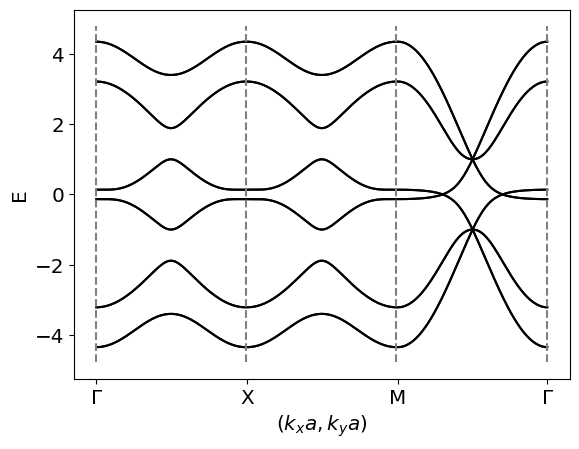

In [7]:
plt.xlabel("$(k_x a,k_y a)$", size='x-large')
plt.ylabel("E", size='x-large')
plt.yticks(size='x-large')
plt.xticks(ticks= [0, 100, 200, 299], labels=[r"$\Gamma$",r"X",r"M", r"$\Gamma$"], size='x-large')
#plt.ylim((-3, 3))

for i in energies:
    plt.plot(p, i, color='black')


plt.vlines([0, 99, 199, 299], [-emax, -emax, -emax, -emax], [emax, emax, emax, emax], colors= 'grey', linestyles='--')
#plt.vlines(250, -2, 2)

plt.savefig("Pictures/ESCpath.png")
plt.show()

In [8]:
H(1, 0)[11]

array([ 0. +0.j, -1.6+0.j,  0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,
        0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,  2. +0.j, -1. +0.j])

In [9]:
k

array([0.        , 0.06346652, 0.12693304, 0.19039955, 0.25386607,
       0.31733259, 0.38079911, 0.44426563, 0.50773215, 0.57119866,
       0.63466518, 0.6981317 , 0.76159822, 0.82506474, 0.88853126,
       0.95199777, 1.01546429, 1.07893081, 1.14239733, 1.20586385,
       1.26933037, 1.33279688, 1.3962634 , 1.45972992, 1.52319644,
       1.58666296, 1.65012947, 1.71359599, 1.77706251, 1.84052903,
       1.90399555, 1.96746207, 2.03092858, 2.0943951 , 2.15786162,
       2.22132814, 2.28479466, 2.34826118, 2.41172769, 2.47519421,
       2.53866073, 2.60212725, 2.66559377, 2.72906028, 2.7925268 ,
       2.85599332, 2.91945984, 2.98292636, 3.04639288, 3.10985939,
       3.17332591, 3.23679243, 3.30025895, 3.36372547, 3.42719199,
       3.4906585 , 3.55412502, 3.61759154, 3.68105806, 3.74452458,
       3.8079911 , 3.87145761, 3.93492413, 3.99839065, 4.06185717,
       4.12532369, 4.1887902 , 4.25225672, 4.31572324, 4.37918976,
       4.44265628, 4.5061228 , 4.56958931, 4.63305583, 4.69652

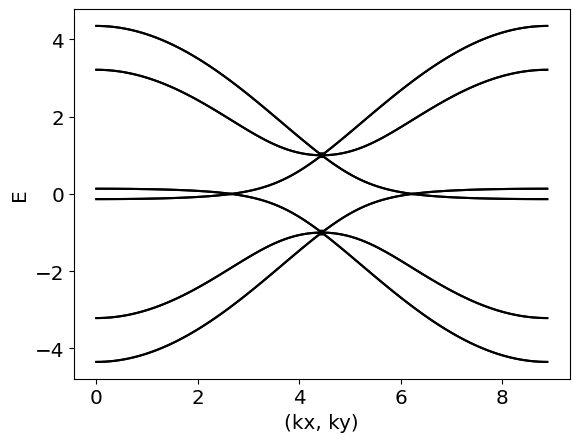

In [10]:
plt.xlabel("(kx, ky)", size='x-large')
plt.ylabel("E", size='x-large')
plt.yticks(size='x-large')
plt.xticks(size='x-large')

#k = np.linspace(0, 2*np.pi, 300)
energies = myModel.solvHam(k, k)
for i in energies:
    plt.plot(k*np.sqrt(2), i, color='black')

#plt.plot(k*np.sqrt(2), energies[5], color='black', label='Ich in weird')

#.legend()
plt.savefig("Pictures/Ebands_SC.png")
plt.show()

In [11]:
Ens = myModel.Es(k)

In [12]:
np.shape(Ens)

(12, 10100)

In [13]:
energies

array([[-4.34739431, -4.34561381, -4.3402743 , ..., -4.3402743 ,
        -4.34561381, -4.34739431],
       [-4.34739431, -4.34561381, -4.3402743 , ..., -4.3402743 ,
        -4.34561381, -4.34739431],
       [-3.21279404, -3.2110949 , -3.20600009, ..., -3.20600009,
        -3.2110949 , -3.21279404],
       ...,
       [ 3.21279404,  3.2110949 ,  3.20600009, ...,  3.20600009,
         3.2110949 ,  3.21279404],
       [ 4.34739431,  4.34561381,  4.3402743 , ...,  4.3402743 ,
         4.34561381,  4.34739431],
       [ 4.34739431,  4.34561381,  4.3402743 , ...,  4.3402743 ,
         4.34561381,  4.34739431]])

In [14]:
E = myModel.Es(k)
emax=np.amax(energies)
Earr = np.linspace(-emax-1,emax+1,200)
#Earr = np.linspace(-emax-1,emax+1,200)
emax

4.347394305987607

In [15]:
DOS1 = myModel.DOS(Earr, k, 0.4e-1)

In [16]:
DOS1

array([5.01828691e-135, 8.16546416e-121, 2.19032727e-107, 9.68904396e-095,
       7.07076239e-083, 8.51669883e-072, 1.69414393e-061, 5.56956377e-052,
       3.02892275e-043, 2.72819647e-035, 4.07642341e-028, 1.01262372e-021,
       4.19488303e-016, 2.91110951e-011, 3.40798310e-007, 6.80822284e-004,
       2.36927569e-001, 1.49647105e+001, 1.88218485e+002, 5.93650258e+002,
       7.81861298e+002, 7.97897832e+002, 8.05921322e+002, 8.17897302e+002,
       8.32986943e+002, 8.51996464e+002, 8.74707165e+002, 9.01709638e+002,
       9.33126694e+002, 9.69659874e+002, 1.01342906e+003, 1.06714891e+003,
       1.13515070e+003, 1.22786459e+003, 1.37177425e+003, 1.64662236e+003,
       1.95102004e+003, 1.72938010e+003, 1.36042639e+003, 1.30385800e+003,
       1.59075106e+003, 1.72621111e+003, 1.66996878e+003, 1.60628203e+003,
       1.55698431e+003, 1.51677354e+003, 1.48254353e+003, 1.45283755e+003,
       1.42795323e+003, 1.40724197e+003, 1.38911362e+003, 1.37406968e+003,
       1.36076617e+003, 1

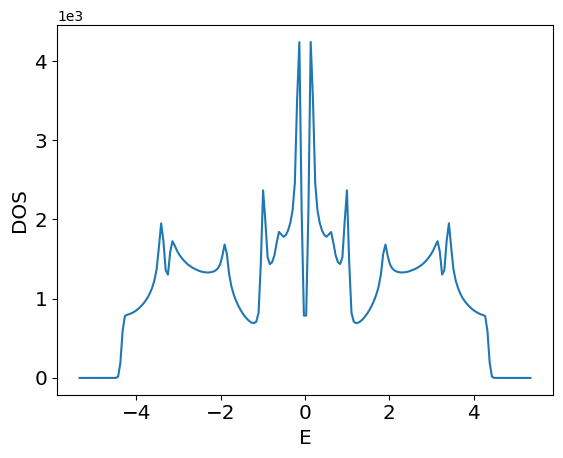

In [17]:
plt.xlabel("E", size='x-large')
plt.ylabel("DOS", size='x-large')
plt.yticks(size='x-large')
plt.xticks(size='x-large')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-3, 3))
#plt.ylim(0, 1e5)
plt.plot(Earr, DOS1)
#plt.vlines([emax, -emax], 0, 100, colors='black')

plt.savefig("Pictures/DOS_SC.png")
plt.show()